Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines. Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

In [1]:
import geopandas as gpd


In [3]:
loans_filepath = ".\GeoSpatialData\kiva_loans\kiva_loans\kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

In [4]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the world and world_loans GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

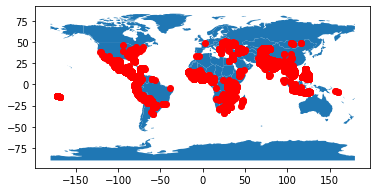

In [9]:
ax = world.plot()
world_loans.plot(color="red", ax=ax)

Next, you'll focus on loans that are based in the Philippines. Use the next code cell to create a GeoDataFrame PHL_loans which contains all rows from world_loans with loans that are based in the Philippines.

In [10]:

PHL_loans = world_loans.loc[world_loans.country=='Philippines'].copy()

world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


Load a GeoDataFrame PHL containing boundaries for all islands in the Philippines.

In [11]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file(".\GeoSpatialData\Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<AxesSubplot:>

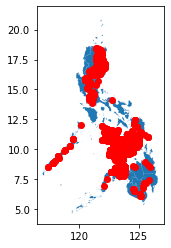

In [12]:
phl_ax = PHL.plot()

PHL_loans.plot(ax=phl_ax, color="red")